In [6]:
# librerias para el procesamiento
%pylab inline
import pandas as pd
import numpy as np

#libreria para correlación
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


(array([-372, -252, -132,  -12,  108,  228,  348]),
 <a list of 7 Text xticklabel objects>)

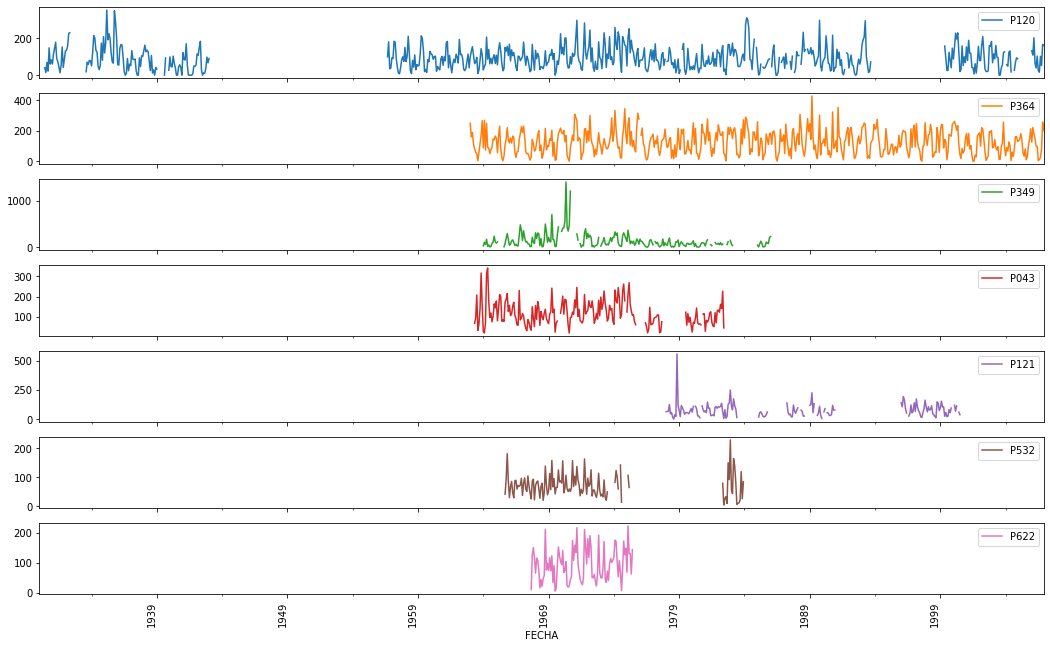

In [3]:
#### Leer los datos de las estaciones
todas_estaciones = ['P120','P364','P349','P043','P121','P532','P622']
# leer el archivo con la información de la estaciones
archivo = pd.ExcelFile('ESTACIONES.xlsx')
#crear un dataframe para almacenar los datos de las estacione
datos = pd.DataFrame()

# leer datos de cada hoja de excel y asignarlos en una variable
# index_col = ingresar el numero de columna de la fecha. Se cuenta desde cero. La columna fecha se convierte en el indice de la tabla
# parsedates = para el ejemplo debe ser True. Analiza si el indice de la tabla es una fecha
# sheet_name = Nombre de la hoja de calculo

for i in todas_estaciones:
    # asignar en una variable los datos de la estacion
    datos_estacion = pd.read_excel(io=archivo,index_col=2,parsedates=True,sheet_name=i)
    # convertir la columna fecha al formato fecha 'AAAA-MM-DD'
    datos_estacion.index = pd.to_datetime(datos_estacion.index)
    # ordenar los datos por la fecha, desde más antigua
    datos_estacion['VALOR'].sort_index(inplace=True)
    # unir los datos de las estaciones en un solo DataFrame
    datos[i] = datos_estacion['VALOR']
    
datos.plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')

In [4]:
#### Periodo de datos para la predicción
inicio = '1963-01-01'
final = '1983-12-01'

In [5]:
# Analizar los vacios de las series de datos
# Crear un DataFrame para revisar
resumen = pd.DataFrame()
#crear una matriz para almacenar el número de vacios

por_vacios = pd.Series()
len_datos = pd.Series()
num_vacios = pd.Series()

# isnull(matriz) = permite identificar los valores nulos en una matriz
# matriz.to_numpy.nonzero()[0] = obtener un array de los valores no tienen datos
# matriz.loc[filas,columnas] = permite extraer una matriz de datos [filas,columnas]
# len(matriz) = longitud de una array
for i in todas_estaciones:
    num_vac = len(pd.isnull(datos.loc[inicio:final,i]).to_numpy().nonzero()[0])
    por_vac = round((100*num_vac/len(datos[i])),2)
    num_vacios[i] = num_vac
    len_datos[i] = len(datos.loc[inicio:final,i])
    por_vacios[i] = por_vac

    
# num_vacios['P120'] = len(pd.isnull(datosP120.loc[:,'VALOR']).to_numpy().nonzero()[0])
resumen['Porcentaje Vacios'] = por_vacios
resumen['Total de datos'] = len_datos
resumen['Numero vacios'] = num_vacios
resumen

Porcentaje Vacios  Total de datos  Numero vacios
P120               0.22             252              2
P364               0.11             252              1
P349               4.65             252             43
P043               5.84             252             54
P121              20.35             252            188
P532              13.96             252            129
P622              17.10             252            158

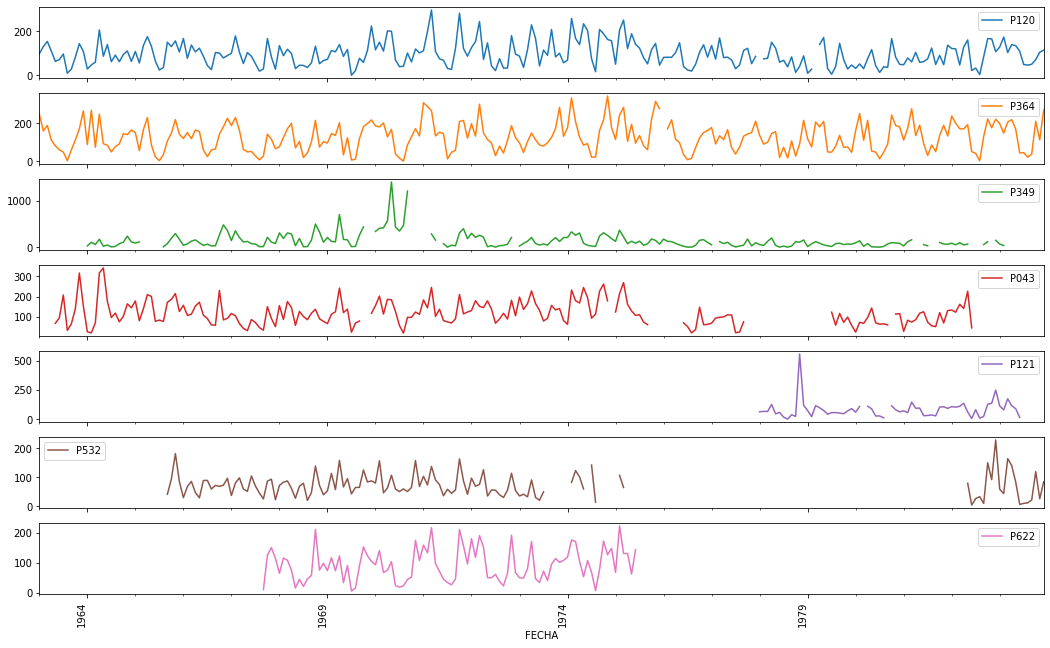

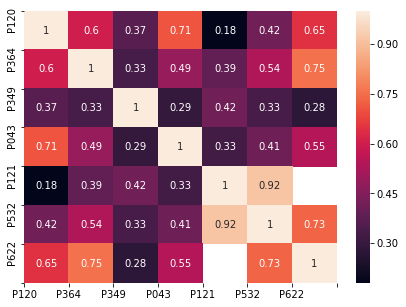

In [7]:
# DataFrame para los datos simulados
datos_simulados = datos.loc[inicio:final,:].copy()
# Graficar los datos
datos_simulados.loc[:,todas_estaciones].plot(subplots=True, figsize=(18, 12)); plt.legend(loc='best')
xticks(rotation='vertical')


# calcular la correlación de los datos
corr = datos_simulados.corr()
#corr = datos.corr()

# generar la maskara para el grafico
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# relación de aspecto del grafico
plt.figure(figsize=(7,5))
#grafico de correlación
sns.heatmap(corr, annot=True)
#Apply xticks
plt.xticks(range(len(corr.columns)+1), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)+1), corr.columns)
#show plot
plt.show()


P622        P364        P532
count   68.000000   68.000000   68.000000
mean    89.527941  125.139706   71.955882
std     54.781852   72.407659   35.247260
min      6.600000    0.000000   19.799999
25%     47.000001   75.225000   46.725000
50%     75.900002  122.450001   64.599998
75%    119.849998  173.799999   88.024998
max    217.300003  308.700012  162.899994

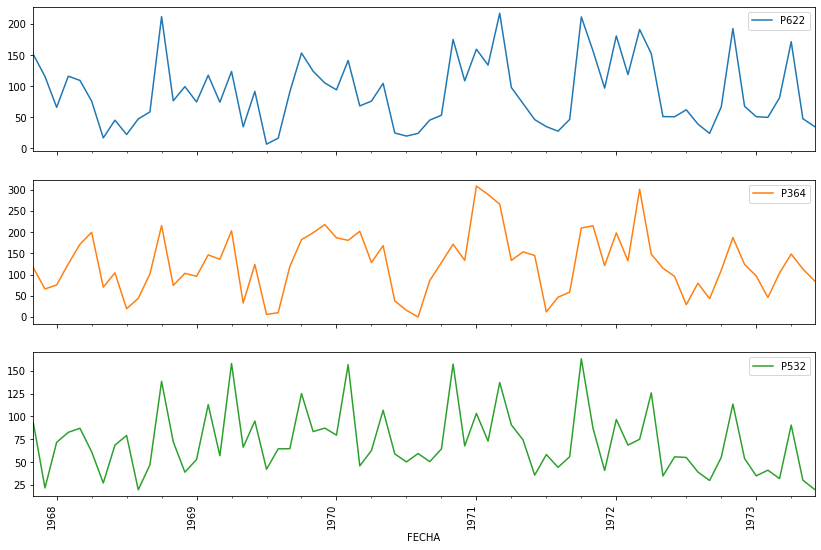

In [11]:
# crear un dataframe para hacer la predcción de los datos 
datos_procesar = pd.DataFrame()
# seleccionar el rango de analisis
inicio = '1967-11-01'
final = '1973-06-01'
#seleccionar las estaciones a intervenir
# est1 y est2 son las estaciones mas completas
est1 = 'P622'
est2 = 'P364'
# est3 estación a completar con la red neuronal
est3 = 'P532'
estaciones = [est1,est2,est3]
# datos que van a entrar en la red neuronal
datos_procesar = datos.loc[inicio:final,estaciones]
# graficar los datos seleccionados
datos_procesar.plot(subplots=True, figsize=(14, 10)); plt.legend(loc='best')
xticks(rotation='vertical')
# describir la tabla de datos a procesar
datos_procesar.describe()

In [32]:
# completar los datos de estacion con los valores promedio
datos_procesar[est1] = datos_procesar[est1].fillna(datos_procesar[est1].mean())
datos_procesar[est2] = datos_procesar[est2].fillna(datos_procesar[est2].mean())
datos_procesar[est3] = datos_procesar[est3].fillna(datos_procesar[est3].mean())
import datetime
datos_simulados
#crear una columna para extraer la semana del año
datos_procesar['date']=datos_procesar.index
datos_simulados['date']=datos_simulados.index

#aplicar una función para extraer la semana del año. Los valores van del 1 al 51
datos_simulados['week'] = datos_simulados['date'].apply(lambda x: x.isocalendar()[1])
datos_simulados['week'] = datos_simulados['date'].apply(lambda x: x.isocalendar()[1])
#borrar la columna creada
del datos_procesar['date']
del datos_simulados['date']
#revisar nuestro dataframe
datos_procesar.head()

P622        P364       P532  week
FECHA                                              
1967-11-01  151.000000  116.099998  92.900002    44
1967-12-01  115.500000   66.000000  21.799999    48
1968-01-01   65.900002   75.500000  71.599998     1
1968-02-01  116.000000  125.199997  82.599998     5
1968-03-01  109.199997  171.300003  87.000000     9

In [13]:

# Asignar en la variable de entrenamiento X_train los valores de las estaciones P120, P364 and #week
# En la variable X_train van los datos de la estaciones más completas y el valor de semana
X_train = datos_procesar.loc[inicio:final,[est1,est2,'week']].astype(float32).values
# Asignar en la variable de entrenamiento Y_train los valor de est3
# En la varianle y_train va los datos de la estación a rellenar.
y_train = datos_procesar.loc[inicio:final,est3].astype(float32).values
# Estandarizar la serie de datos eliminando la media y escalando a la varianza de la unidad
from sklearn.preprocessing import StandardScaler
# Definir el escalar 
scaler = StandardScaler().fit(X_train)
# Cambiar la serie transformando la serie a valores entre -1 a 1
X_train = scaler.transform(X_train)
# revisar la serie de datos
X_train[0:10]

array([[ 1.1304675e+00, -1.2577285e-01,  1.2054217e+00],
       [ 4.7762462e-01, -8.2283300e-01,  1.4652274e+00],
       [-4.3451640e-01, -6.9065595e-01, -1.5874889e+00],
       [ 4.8681960e-01,  8.3885586e-04, -1.3276833e+00],
       [ 3.6176795e-01,  6.4224565e-01, -1.0678777e+00],
       [-2.5061703e-01,  1.0373855e+00, -7.4312055e-01],
       [-1.3393016e+00, -7.6439691e-01, -4.8331490e-01],
       [-8.1518823e-01, -2.9273337e-01, -2.2350925e-01],
       [-1.2399958e+00, -1.4725877e+00,  1.0124779e-01],
       [-7.7840835e-01, -1.1289272e+00,  3.6105344e-01]], dtype=float32)

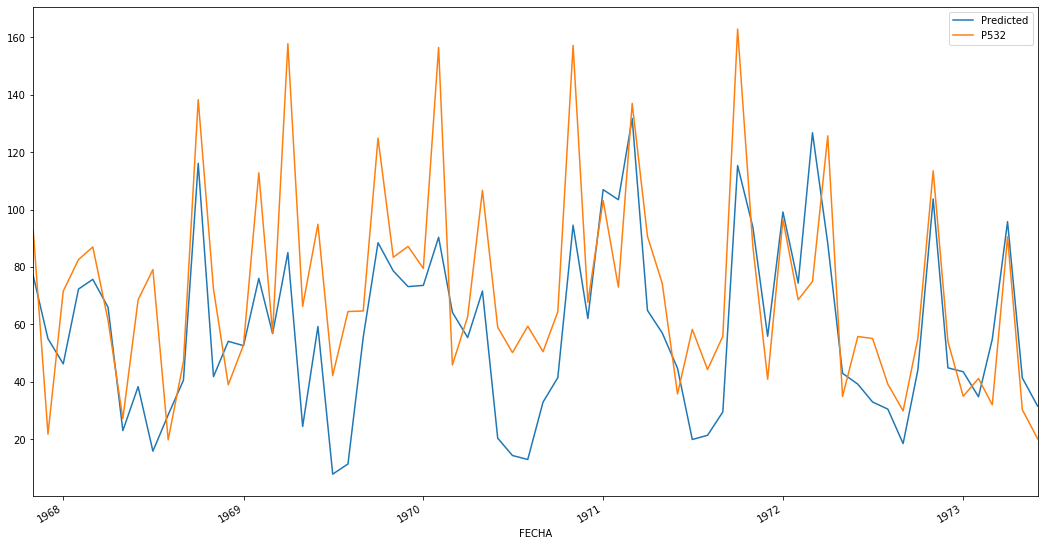

In [49]:
inicio = '1967-11-01'
final = '1973-06-01'
#### Entrenar al modelo para predecir los valos
from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(Dense(12, activation='linear', input_shape=(3,)))
model.add(Dense(8, activation='linear'))
model.add(Dense(1, activation='linear'))
#model.summary()
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=200,verbose=0)
# cargar en una variable los datos arroja la red neuronal
y_pred = model.predict(X_train)
#graficar los datos de predicción
plot(datos_procesar.index,y_pred,label='Predicted')
#graficar los datos de est3
datos.loc[inicio:final,est3].plot(figsize=(18,10))
legend(loc='best')

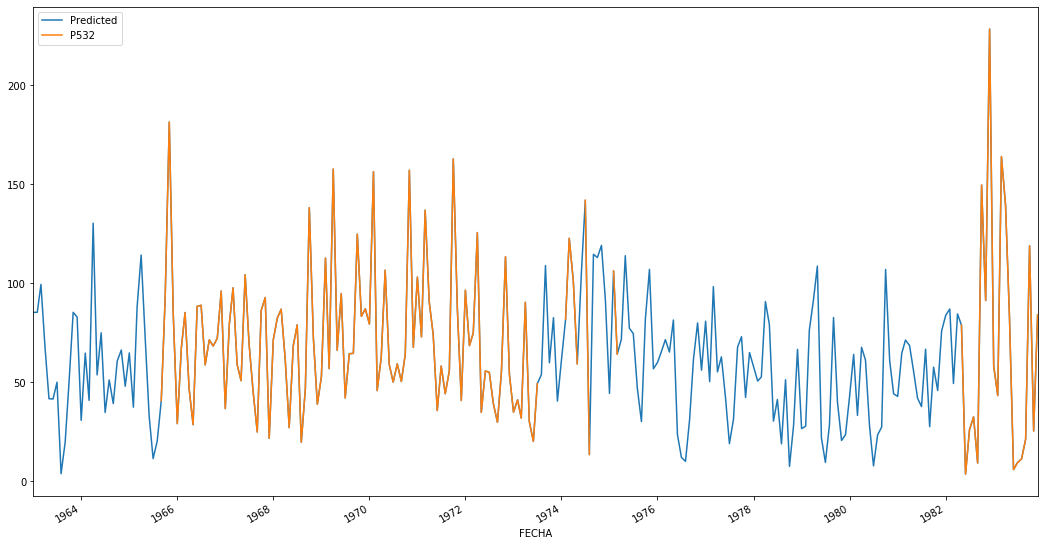

In [50]:
#### Periodo de datos para la predicción
inicio = '1963-01-01'
final = '1983-12-01'
# matriz para los datos simulados
serie_simulada = pd.Series() 
# Rellenar las estaciones más completoas
datos_simulados['P120'] = datos_simulados['P120'].fillna(datos_simulados['P120'].mean())
datos_simulados[est2] = datos_simulados[est2].fillna(datos_simulados[est2].mean())

# obtener el rango de datos que esta con vacios
rango = pd.isnull(datos.loc[inicio:final,est3]).to_numpy().nonzero()[0]
#Obtener los valores de est1, est2 basado en el rango de vacios de est3
X_missing = datos_simulados.loc[inicio:final,['P120',est2,'week']].iloc[rango].astype(float32).values
# Define the scaler 
scaler = StandardScaler().fit(X_missing)

# Scale the train set
X_missing = scaler.transform(X_missing)


# obtener los valores simulados con base al entrenamiento del modelo
num_datos = len (X_missing)
y_missing = model.predict(X_missing)
y_missing = y_missing.reshape([num_datos]).tolist()

serie_simulada = datos.loc[inicio:final,est3].copy()
# agregar los datos simulados a la estación P043
serie_simulada.iloc[rango] = y_missing

#graficar los datos de predicción
plot(datos_simulados.index,serie_simulada,label='Predicted')
#graficar los datos de est3
datos.loc[inicio:final,est3].plot(figsize=(18,10))
legend(loc='best')
